In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
from sklearn.metrics import r2_score
from helper import process_log_data

current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)

# Process Data

In [5]:
# Response
df = process_log_data('Response', parent_directory + '/data/adreturned_1000126_20230525001500.csv')

# Display DataFrame and Data Types

In [12]:
pd.set_option('display.max_columns', None)
display(df.head(3))
display(df.tail(3))
print(df.dtypes)

,timestamp,RequestId,RecordID,apiVersion,LogVersion,PublisherName,SiteId,AdName,AdCaption,AdAddress,AdCity,AdState,AdZip,AdCountry,AdLatitude,AdLongitude,AdPhoneNo,AdDisplayPhoneNo,AdCategory,AdRating,AdVendor,BillingParamter,CreativeId,AdvBidRates,PubBidRates,BidFloor,BidAmount,UID,UIDType,LatUsed,LongUsed,Distance,tagRequest,bidfloor3,bid3,win3,bundleId
0,2023-05-25 00:13:55,9e41ebc0-01a3-4071-94ee-18ac5f37c902,2-80000357800-393244-26218616,1.0,2.4,rubicon,Water Sort Puzzle - Sort Color,"JUST LISTED in 33 W Delaware Place #7G, Chicag...",NaN,33 w delaware place #7g,chicago,il,60610,us,41.89897,-87.629654,NaN,NaN,Real Estate,NaN,2,80000357800@5395@0@393244@26218616,1980144,1:0.0019,1:0.0019,1.248255,1.258255,97404e2d-b313-43ab-9e61-bc9fe06aa1e9,IDFA,41.77,-87.67,9.159628,0,0.0,2.3,0.0,1597897013
1,2023-05-25 00:13:55,8edcfae9-ae17-4043-b73b-5a66beb19345,2-80000358415-393897-26227260,1.0,2.4,google,OnDemandKorea: Watch Korean TV,"JUST LISTED in 415 Lyerly Pointe, Alpharetta, ...",NaN,415 lyerly pointe,alpharetta,ga,30022,us,34.045208,-84.258446,NaN,NaN,Real Estate,NaN,2,80000358415@5809@0@393897@26227260,1983972,1:0.0019,1:0.0019,0.07,0.29,DA431409-A176-F340-6BCD-AA3103E950B6,AID,33.939999,-84.32,8.088002,0,0.0,2.3,0.0,917796578
2,2023-05-25 00:13:56,a083249b-29b1-4386-b0b9-576d83f251ea,2-80000353745-389073-26090267,1.0,2.4,google,CoinGecko - Live Crypto Prices,"JUST LISTED in 574 Legacy NE Court, Rockford, ...",NaN,574 legacy ne court,rockford,mi,49341,us,43.129494,-85.57461,NaN,NaN,Real Estate,NaN,2,80000353745@38033@0@389073@26090267,1950893,1:0.0019,1:0.0019,0.01,0.35,da45f8d5-d815-cc6f-d521-c6512e2157bb,AID,42.959999,-85.669998,12.676371,0,0.0,2.3,0.0,com.coingecko.coingeckoapp


,timestamp,RequestId,RecordID,apiVersion,LogVersion,PublisherName,SiteId,AdName,AdCaption,AdAddress,AdCity,AdState,AdZip,AdCountry,AdLatitude,AdLongitude,AdPhoneNo,AdDisplayPhoneNo,AdCategory,AdRating,AdVendor,BillingParamter,CreativeId,AdvBidRates,PubBidRates,BidFloor,BidAmount,UID,UIDType,LatUsed,LongUsed,Distance,tagRequest,bidfloor3,bid3,win3,bundleId
13471,2023-05-25 00:14:59,b8290a9e-3c70-45e1-8699-1ad341f1e314,2-80000358335-393814-26226770,1.0,2.4,rubicon,Killer Sudoku - Puzzle Games,"For Sale in 32502, Pensacola, FL, us",NaN,1 port royal way #1 & 3,pensacola,fl,32502,us,30.403908,-87.2149,NaN,NaN,Real Estate,NaN,2,80000358335@67188@0@393814@26226770,1983392,1:0.0036,1:0.0036,1.372093,1.392093,473b3f52-050b-4b79-8cd4-14515a37a89d,IDFA,30.37,-87.33,7.256965,0,0.0,4.28,0.0,1549645019
13472,2023-05-25 00:14:59,c7d44e36-798e-48b7-a11f-f980f8680ecc,2-80000354509-389898-26109098,1.0,2.4,rubicon,Blis Media XAPI,"JUST LISTED in 656 S 5TH AVE, Royersford, PA 1...",NaN,656 s 5th ave,royersford,pa,19468,us,40.18145,-75.52974,NaN,NaN,Real Estate,NaN,2,80000354509@46837@0@389898@26109098,1956235,1:0.0019,1:0.0019,0.2,0.23,A67F49DF-C262-41E4-A6CE-1939C5842AA7,IDFA,40.2874,-75.2156,18.134192,0,0.0,2.3,0.0,500963785
13473,2023-05-25 00:14:59,87796626-1830-43de-bafd-d1c3202919c2,2-80000345571-380606-25839186,1.0,2.4,rubicon,Alarm Clock for Me free,3001????_???513_???????_20230522,NaN,???????,????1??28-1,????,2110041,jp,35.579247,139.63907,NaN,NaN,Education,NaN,2,80000345571@28502@0@380606@25839186,1887860,1:0.005,1:0.005,1.471121,1.701121,99473565-efbc-43b4-acb1-6eeff6c9916c,AID,35.57444,139.62755,0.728355,0,0.0,5.94,0.0,com.apalon.myclockfree


timestamp           datetime64[ns]
RequestId                   object
RecordID                    object
apiVersion                  object
LogVersion                  object
PublisherName               object
SiteId                      object
AdName                      object
AdCaption                   object
AdAddress                   object
AdCity                      object
AdState                     object
AdZip                       object
AdCountry                   object
AdLatitude                  object
AdLongitude                 object
AdPhoneNo                   object
AdDisplayPhoneNo            object
AdCategory                  object
AdRating                    object
AdVendor                    object
BillingParamter             object
CreativeId                  object
AdvBidRates                 object
PubBidRates                 object
BidFloor                    object
BidAmount                   object
UID                         object
UIDType             

# Response Data Summarization

In [7]:
missing_values_count = df.isna().sum()
total_rows = len(df)
missing_values_percentage = (missing_values_count / total_rows) * 100

missing_data_summary = pd.DataFrame({
    'Column': missing_values_count.index,
    'Missing Values': missing_values_count.values,
    'Percentage': missing_values_percentage.values
})

display(missing_data_summary)

,Column,Missing Values,Percentage
0,timestamp,0,0.000000
1,RequestId,0,0.000000
2,RecordID,0,0.000000
3,apiVersion,0,0.000000
4,LogVersion,0,0.000000
5,PublisherName,0,0.000000
6,SiteId,15,0.111326
7,AdName,0,0.000000
8,AdCaption,12594,93.468903
9,AdAddress,1016,7.540448


In [8]:
df.describe(include='all', datetime_is_numeric=True)

,timestamp,RequestId,RecordID,apiVersion,LogVersion,PublisherName,SiteId,AdName,AdCaption,AdAddress,...,UID,UIDType,LatUsed,LongUsed,Distance,tagRequest,bidfloor3,bid3,win3,bundleId
count,13474,13474,13474,13474.0,13474.0,13474,13459,13474,880,12458,...,10532,13474,13474.000000,13474.000000,13474.0,13474.0,13474.0,13474.0,13474.0,13474
unique,NaN,11545,1145,1.0,1.0,5,1945,584,61,975,...,7103,5,5983.000000,6032.000000,8099.0,1.0,1.0,25.0,1.0,2001
top,NaN,84c56a77-5cbe-43bd-83c5-922fbb2fb923,2-80000359556-395110-26322327,1.0,2.4,rubicon,microsoftcasualgames.com,???,?????<br>?9?????START???????????????,???,...,500fa162-7ff2-4641-a11b-262fc18fe18a,AID,39.950001,-75.169998,-1.0,0.0,0.0,2.3,0.0,microsoftcasualgames.com
freq,NaN,2,144,13474.0,13474.0,4507,602,168,88,389,...,42,9366,115.000000,102.000000,92.0,13474.0,13474.0,7611.0,13474.0,602
mean,2023-05-25 00:14:28.098114816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2023-05-25 00:13:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2023-05-25 00:14:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2023-05-25 00:14:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2023-05-25 00:14:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2023-05-25 00:14:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Specify the columns for which you want to get the value counts
columns = ['PublisherName','SiteId','AdName','AdAddress','AdCategory','AdVendor','AdvBidRates','PubBidRates',
               'BidFloor','BidAmount','UIDType','Distance','tagRequest','bidfloor3','bid3','win3']

# Iterate over the columns and display the value counts table for each column
for column in columns:
    value_counts_table = df[column].value_counts().to_frame()
    print(f"Value Counts for {column}:")
    display(value_counts_table)
    print()

Value Counts for PublisherName:


,PublisherName
rubicon,4507
google,4056
appnexus,2488
openx,2421
spotx,2



Value Counts for SiteId:


,SiteId
microsoftcasualgames.com,602
Alarm Clock for Me free,537
Happy Color®: Coloring Book,378
Musi - Simple Music Streaming,376
Blis Media XAPI,349
...,...
Lexulous Word Game,1
Color Pixel Art - Atti Land,1
Pressure Washing Run,1
Mini Block Craft,1



Value Counts for AdName:


,AdName
???,168
??????,153
"JUST LISTED in 49091, Sturgis, MI, us",144
???? ?????? ??,117
"JUST LISTED in 49065, Lawton, MI, us",104
...,...
Y3762DA - Serra Traverse City,1
???? ???????? ???,1
2023?5??,1
"JUST LISTED in Mi 1338.5 Alaska Highway, Tok, AK 99780",1



Value Counts for AdAddress:


,AdAddress
???,389
?????????????,148
4721 highland ave,144
646 courtland cir,104
??????,102
...,...
300 bedford st ste 304,1
150 allen st,1
10239 glen eagle ln,1
108 old mill dr,1



Value Counts for AdCategory:


,AdCategory
Real Estate,10453
Automotive,808
Education,794
Food & Drink,308
Uncategorized,218
News,192
Careers,169
Business,134
Arts & Entertainment,109
Shopping,82



Value Counts for AdVendor:


,AdVendor
2,13474



Value Counts for AdvBidRates:


,AdvBidRates
1:0.0019,7611
1:0.0061,1167
1:0.005,947
1:0.0022,776
1:0.0025,737
1:0.0024,693
1:0.0033,440
1:0.0023,283
1:0.0036,281
1:0.003,239



Value Counts for PubBidRates:


,PubBidRates
1:0.0019,7611
1:0.0061,1167
1:0.005,947
1:0.0022,776
1:0.0025,737
1:0.0024,693
1:0.0033,440
1:0.0023,283
1:0.0036,281
1:0.003,239



Value Counts for BidFloor:


,BidFloor
0.010000,1291
0.200000,409
0.172136,305
1.471121,279
0.946666,259
...,...
1.614666,1
1.905000,1
0.190989,1
1.178000,1



Value Counts for BidAmount:


,BidAmount
0.210000,78
0.390000,75
0.410000,68
0.340000,64
0.440000,64
...,...
1.049000,1
0.383749,1
0.506700,1
2.016886,1



Value Counts for UIDType:


,UIDType
AID,9366
GENERIC_ID,1709
NONE,1233
IDFA,1158
GOOGLE_UID,8



Value Counts for Distance:


,Distance
-1.000000,92
0.540700,65
0.165970,38
2.304092,28
9.571527,28
...,...
17.601148,1
19.476423,1
2.759068,1
12.344931,1



Value Counts for tagRequest:


,tagRequest
0,13474



Value Counts for bidfloor3:


,bidfloor3
0.0,13474



Value Counts for bid3:


,bid3
2.300000,7611
7.310000,1167
5.940000,947
2.700000,776
2.940000,579
3.930000,440
3.000000,353
4.280000,281
3.600000,239
2.800000,229



Value Counts for win3:


,win3
0.0,13474


In [10]:
mean_latitude = df['AdLatitude'].mean()
mean_longitude = df['AdLongitude'].mean()

heatmap_map = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=10)


heat_data = df[['AdLatitude', 'AdLongitude']].dropna()
heat_map_layer = HeatMap(heat_data)

heatmap_map.add_child(heat_map_layer)

# Display the map
heatmap_map

In [11]:
mean_latitude = df['LatUsed'].mean()
mean_longitude = df['LongUsed'].mean()

heatmap_map = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=10)


heat_data = df[['LatUsed', 'LongUsed']].dropna()
heat_map_layer = HeatMap(heat_data)

heatmap_map.add_child(heat_map_layer)

# Display the map
heatmap_map

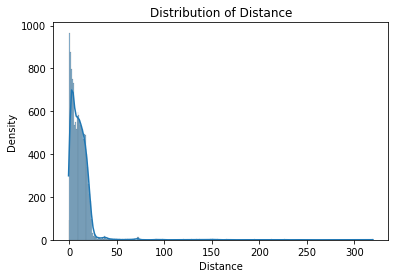

In [14]:
# Plot the distribution of the "distance" column
sns.histplot(data=df, x='Distance', kde=True)

# Set the labels and title
plt.xlabel('Distance')
plt.ylabel('Density')
plt.title('Distribution of Distance')

# Display the plot
plt.show()

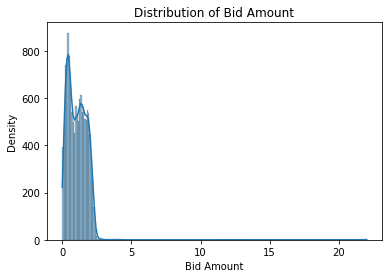

In [16]:
# Plot the distribution of the "BidAmount" column
sns.histplot(data=df, x='BidAmount', kde=True)

# Set the labels and title
plt.xlabel('Bid Amount')
plt.ylabel('Density')
plt.title('Distribution of Bid Amount')

# Display the plot
plt.show()

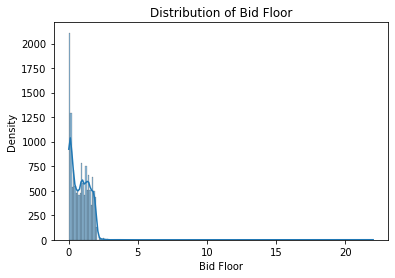

In [17]:
# Plot the distribution of the "BidFloor" column
sns.histplot(data=df, x='BidFloor', kde=True)

# Set the labels and title
plt.xlabel('Bid Floor')
plt.ylabel('Density')
plt.title('Distribution of Bid Floor')

# Display the plot
plt.show()

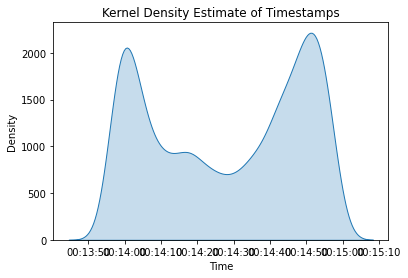

In [18]:
# Plot KDE of time
sns.kdeplot(data=df, x='timestamp', fill=True)

# Set the labels and title
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Timestamps')

# Display the plot
plt.show()